# Clasificación

Un notebook para explicar con Python el problema de la clasificación.
Empezamos por importar las librerías que usaremos

In [26]:
import numpy as np
import matplotlib.pyplot as plt

**Paso 1**
Generamos 2 grupos de datos. 

In [34]:
# Clase 0
n0 = 100
mean0 = -3
x0 = np.random.normal(mean0, 1, n0)
y0 = np.random.normal(mean0, 1, n0)

# Clase 1
n1 = 100
mean1 = 3
x1 = np.random.normal(mean1, 1, n1)
y1 = np.random.normal(mean1, 1, n1)


Pintamos nuestros datos para entenderlos mejor

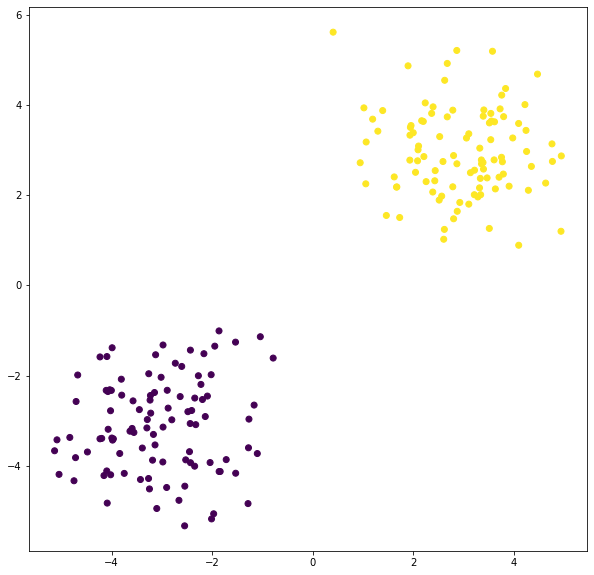

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(np.concatenate((x0, x1), 0), np.concatenate((y0, y1), 0), c=[0] * n0 + [1] * n1)
plt.show()

Antes de continuar, observe que en python, tenemos varias formas de definir "arreglos". Una de ellas es usando listas nativas y la otra es usando arreglos de numpy. Aunque las 2 sirven para guardar vectores o matrices, debe tener cuidado porque las operaciones básica entre elementos de esos 2 tipos son bien diferentes. Considere el siguiente ejemplo, donde se definen 4 vectores cada uno con 2 elementos, y vea el efecto que tienen las operaciones algebráicas sobre ellos:

In [31]:
# Python list vs Numpy array
l1 = [1, 2]
l2 = [3, 2]
print(l1 * 2) 
print(l1 + l2) 
print(l1)

a1 = np.array([1, 2])
a2 = np.array([3, 4])

print(a1 * 2)
print(a1 + a2)

[1, 2, 1, 2]
[1, 2, 3, 2]
[1, 2]
[2 4]
[4 6]


Note que el operador **+** sobre arreglos de numpy, simplemente suma los elementos de los arreglos, pero el mismo operador sobre listas de python, da como resultado la concatenación de las listas. Si quiere concatenar arreglos de numpy, debe usar la función de **concatenate**. Para entenderla mire el siguiente código:

In [38]:
a1 = np.array([[1, 2], [3, 4]]) # Creamos un vector unidimensional
a2 = np.array([[5, 6], [7, 8]]) # Creamos un vector unidimensional

print("Concatenación horizontal, o por filas o en la primera dimensión")
print(np.concatenate((a1, a2), 0))

print("Concatenación vertical, o por columnas o en la segunda dimensión")
print(np.concatenate((a1, a2), 1))

Concatenación horizontal, o por filas o en la primera dimensión
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
Concatenación vertical, o por columnas o en la segunda dimensión
[[1 2 5 6]
 [3 4 7 8]]


**Paso 2**
Generamos un conjunto de datos que usaremos en nuestro ejemplo de clasificación. X, estará compuesto por los pares [x, y] y la clase será 1 para los datos del conjunto (x1, y1) y 0 para los datos del conjunto (x0, y0). Convierta los datos a arreglos de numpy.

In [32]:
X = np.array([np.concatenate((x0, x1), 0), np.concatenate((y0, y1), 0)]).T
Y = np.array([0] * n0 + [1] * n1)
print(X.shape)
print(Y)

(200, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Un clasificador binario es una funció `prediction(x, f)`
* Si f(x) >=0 entonces C1
* Si f(x) < 0 entonces C2

A f se le llama el modelo.

**Tarea**
Implemente la función de predicción en Python. Suponga que C1 = 1 y  C2 = 0

In [113]:
## INSERTE EL CÓDIGO AQUI
def predictor(x, model):
    if model(x) >= 0:
        return 1
    else:
        return 0
## FIN

Dado el modelo `model1`, que se da en la siguiente casilla, pruebe que clasificaciones data para los ejemplos [0, 2], [-3, 3.1], [-3, 2.9], [2, 1], [3, -2]

In [114]:
def model1(data):
    return (1 * data[0]) + (-1 * data[1])

In [116]:
## INSERTE EL CÓDIGO AQUI
print(predictor([0, 2], model1))
print(predictor([-3, 3.1], model1))
print(predictor([-3, 2.9], model1))
print(predictor([2, 1], model1))
print(predictor([3, -2], model1))
## FIN

0
0
0
1
1


Considere el modelo2. 

In [120]:
def model2(data):
    return (1 * data[0]) + (2 * data[1])

**Paso 3** Use el modelo 1 y el modelo 2, para clasificar todos los datos disponibles en x. Debe obtener una lista, donde cada elementos es la predicción realizada para el ejemplo correspondiente. Al final la lista debe tener el mismo tamaño que **x**, y por consiguiente que **y**

In [121]:
## INSERTE EL CÓDIGO AQUI
pred1 = [predictor(x, model1) for x in X]
pred2 = [predictor(x, model2) for x in X]
#END

Defina una función de pérdida como se mostró en las diapositivas(Contar cuantas veces se equivoca el modelo)

In [124]:
## INSERTE EL CÓDIGO AQUI

#END

Use la función de perdida para evaluar los 2 modelos

In [ ]:
## INSERTE EL CÓDIGO AQUI

# END

¿Cúal de los 2 modelos funciona mejor? ¿Está acorde a nuestro análisis inicial?

# Aprendiendo un clasificador con gradiente descendente

En general, usted no necesita definir un modelo como una función. Usualmente, la función queda definida completamente por sus parámetros, que se pueden representar por un vector. Por ejemplo, el modelo 1 quedaría definido por sus dos multiplicadores [1, -1] y el modelo 2 por el vector [1, 2].

Ahora vamos a implementar el algoritmo de gradiente descendiente, que mostramos en la presentación, para aprender los el vector [w0, w1] que permite clasificar de la mejor manera nuestros datos x, y.